<a href="https://colab.research.google.com/github/abhinavbammidi1401/ADA/blob/main/text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 26.0 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=571745f1848caadce65ab3c5f5092f6395be836c109e89d4d8f4ce5e60b72990
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ebcd3305b665aae6e6656dffc2bb3d8aa0c23e2b2ccfbd499a032fffd42e068a
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [3]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
import warnings
warnings.filterwarnings("ignore")

In [4]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
text = ''' Case Title: State of Maharashtra v. Rajesh Kumar

Case Number: 2021/CR/5678

Court: High Court of Bombay

Date: March 10, 2023

Judge: Honorable Justice R.K. Desai

Parties:

Plaintiff: The State of Maharashtra
Defendant: Rajesh Kumar
Charges:

Section 302 - Indian Penal Code (IPC) - Murder
Section 397 - IPC - Robbery, or dacoity, with attempt to cause death or grievous hurt
Section 411 - IPC - Dishonestly receiving stolen property
Summary of Facts:
On the night of October 15, 2021, the defendant, Rajesh Kumar, along with two accomplices, forcibly entered the residence of the victim, Mr. Shyam Lal, located at 45, Andheri East, Mumbai. The intruders overpowered the victim, binding him and his wife, Mrs. Kamla Lal, with ropes. They then proceeded to loot the house, taking cash, jewelry, and other valuable items.

During the course of the robbery, an altercation occurred between the defendant and Mr. Shyam Lal. The defendant, in a fit of rage, struck the victim multiple times with a blunt object, resulting in Mr. Lal's death. The assailants then fled the scene with the stolen property.

The incident was reported by Mrs. Kamla Lal, who managed to untie herself and call the police. The police arrived promptly and initiated an investigation. Based on eyewitness accounts and forensic evidence, Rajesh Kumar was apprehended within a week and found in possession of several items identified as stolen from the Lal residence.

Evidence Presented:

Testimony of Mrs. Kamla Lal: The victim’s wife provided a detailed account of the events, identifying Rajesh Kumar as one of the assailants.
Forensic Evidence: Bloodstains matching the victim’s blood type were found on the clothes of the defendant.
CCTV Footage: Surveillance cameras from a neighboring property captured the entry and exit of the accused.
Recovered Stolen Items: Jewelry and cash stolen from the Lal residence were recovered from the defendant’s hideout.
Defense Argument:
The defense argued that Rajesh Kumar was not present at the crime scene and was wrongfully accused. They suggested that the evidence was circumstantial and that the defendant was a victim of mistaken identity. The defense also highlighted the lack of direct eyewitnesses other than the victim's wife.

Prosecution Argument:
The prosecution relied on the strong testimonial evidence of Mrs. Kamla Lal, supported by forensic evidence and CCTV footage. They argued that the recovered stolen items found in the possession of the defendant conclusively linked him to the crime. The prosecution emphasized the brutality of the murder and the overwhelming evidence of the defendant's guilt.

Verdict:
The court found Rajesh Kumar guilty on all charges, including murder, robbery, and possession of stolen property.

Sentencing:
Rajesh Kumar was sentenced to life imprisonment for the murder charge under Section 302 of the IPC. Additionally, he received ten years of rigorous imprisonment for the robbery charge under Section 397 of the IPC and five years for receiving stolen property under Section 411 of the IPC, with sentences to run concurrently.'''

In [6]:
parser = PlaintextParser.from_string(text, Tokenizer("english"))

TRsummarizer = TextRankSummarizer()
LRsummarizer = LexRankSummarizer()
LSAsummarizer = LsaSummarizer()

TRSummary = TRsummarizer(parser.document, 3)
LRSummary = LRsummarizer(parser.document, 3)
LSASummary = LSAsummarizer(parser.document, 3)
sum_senetence = ""

for sentence in TRSummary:
    print(sentence)

Section 302 - Indian Penal Code (IPC) - Murder Section 397 - IPC - Robbery, or dacoity, with attempt to cause death or grievous hurt Section 411 - IPC - Dishonestly receiving stolen property Summary of Facts: On the night of October 15, 2021, the defendant, Rajesh Kumar, along with two accomplices, forcibly entered the residence of the victim, Mr. Shyam Lal, located at 45, Andheri East, Mumbai.
The prosecution emphasized the brutality of the murder and the overwhelming evidence of the defendant's guilt.
Additionally, he received ten years of rigorous imprisonment for the robbery charge under Section 397 of the IPC and five years for receiving stolen property under Section 411 of the IPC, with sentences to run concurrently.


In [7]:
for sentence in LRSummary:
    print(sentence)

Based on eyewitness accounts and forensic evidence, Rajesh Kumar was apprehended within a week and found in possession of several items identified as stolen from the Lal residence.
Prosecution Argument: The prosecution relied on the strong testimonial evidence of Mrs. Kamla Lal, supported by forensic evidence and CCTV footage.
Verdict: The court found Rajesh Kumar guilty on all charges, including murder, robbery, and possession of stolen property.


In [8]:
for sentence in LSASummary:
    print(sentence)

They then proceeded to loot the house, taking cash, jewelry, and other valuable items.
Based on eyewitness accounts and forensic evidence, Rajesh Kumar was apprehended within a week and found in possession of several items identified as stolen from the Lal residence.
Verdict: The court found Rajesh Kumar guilty on all charges, including murder, robbery, and possession of stolen property.


In [9]:
LR_text = '''Based on eyewitness accounts and forensic evidence, Rajesh Kumar was apprehended within a week and found in possession of several items identified as stolen from the Lal residence.
Prosecution Argument: The prosecution relied on the strong testimonial evidence of Mrs. Kamla Lal, supported by forensic evidence and CCTV footage.
Verdict: The court found Rajesh Kumar guilty on all charges, including murder, robbery, and possession of stolen property.'''

In [11]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=c6acc3a6e13275544bc2e1b1c7ce43bb70a101822ef14a0ca2669b9d36432f4f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [12]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

ROUGEscores = scorer.score(text, LR_text)

for key, value in ROUGEscores.items():
    print(f"{key}: Precision: {value.precision:.2f}, Recall: {value.recall:.2f}, F1 Score: {value.fmeasure:.2f}")

score = sentence_bleu(text, LR_text)

rouge1: Precision: 1.00, Recall: 0.14, F1 Score: 0.24
rouge2: Precision: 0.97, Recall: 0.13, F1 Score: 0.23
rougeL: Precision: 1.00, Recall: 0.14, F1 Score: 0.24


In [13]:
import torch
from transformers import BartTokenizer, BartForConditionalGeneration

model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [14]:
inputs = tokenizer(text, max_length=1024, return_tensors="pt", truncation=True)
summary_ids = model.generate(inputs["input_ids"], num_beams=4, length_penalty=2.0, max_length=512, min_length=30, no_repeat_ngram_size=3, early_stopping=True)

In [15]:
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("Summary:")
print(summary)

Summary:
Rajesh Kumar was found guilty on all charges, including murder, robbery, and possession of stolen property. He was sentenced to life imprisonment for the murder charge under Section 302 of the IPC.


In [17]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

ROUGEscores = scorer.score(text, summary)

for key, value in ROUGEscores.items():
    print(f"{key}: Precision: {value.precision:.2f}, Recall: {value.recall:.2f}, F1 Score: {value.fmeasure:.2f}")

rouge1: Precision: 1.00, Recall: 0.07, F1 Score: 0.12
rouge2: Precision: 0.87, Recall: 0.06, F1 Score: 0.10
rougeL: Precision: 0.97, Recall: 0.06, F1 Score: 0.12


In [19]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu

# Assuming `text`, `LR_text`, and `summary` are already defined in your notebook

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Scores for LR_text
LR_ROUGEscores = scorer.score(text, LR_text)
LR_BLEUscore = sentence_bleu([text], LR_text)

# Scores for summary
summary_ROUGEscores = scorer.score(text, summary)
summary_BLEUscore = sentence_bleu([text], summary)

# Organize the data
metrics = ['Precision', 'Recall', 'F1 Score']
LR_scores = {
    'rouge1': [LR_ROUGEscores['rouge1'].precision, LR_ROUGEscores['rouge1'].recall, LR_ROUGEscores['rouge1'].fmeasure],
    'rouge2': [LR_ROUGEscores['rouge2'].precision, LR_ROUGEscores['rouge2'].recall, LR_ROUGEscores['rouge2'].fmeasure],
    'rougeL': [LR_ROUGEscores['rougeL'].precision, LR_ROUGEscores['rougeL'].recall, LR_ROUGEscores['rougeL'].fmeasure],
    'BLEU': [LR_BLEUscore, LR_BLEUscore, LR_BLEUscore]
}

summary_scores = {
    'rouge1': [summary_ROUGEscores['rouge1'].precision, summary_ROUGEscores['rouge1'].recall, summary_ROUGEscores['rouge1'].fmeasure],
    'rouge2': [summary_ROUGEscores['rouge2'].precision, summary_ROUGEscores['rouge2'].recall, summary_ROUGEscores['rouge2'].fmeasure],
    'rougeL': [summary_ROUGEscores['rougeL'].precision, summary_ROUGEscores['rougeL'].recall, summary_ROUGEscores['rougeL'].fmeasure],
    'BLEU': [summary_BLEUscore, summary_BLEUscore, summary_BLEUscore]
}

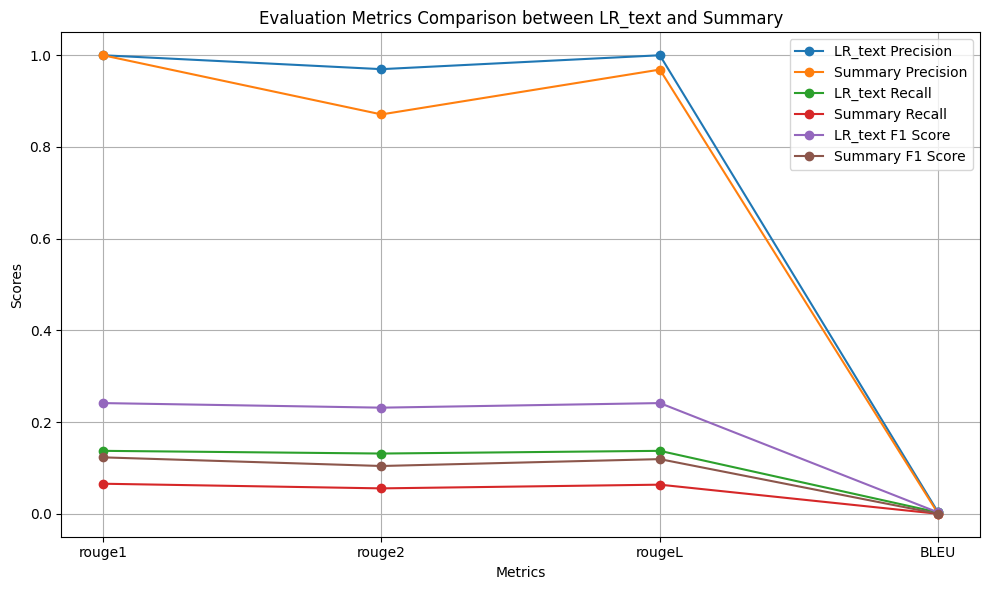

In [22]:
import matplotlib.pyplot as plt

# Define the metrics and their corresponding scores
metrics = ['rouge1', 'rouge2', 'rougeL', 'BLEU']
metric_types = ['Precision', 'Recall', 'F1 Score']

# Prepare the data for plotting
LR_plot_data = [LR_scores[metric] for metric in metrics]
summary_plot_data = [summary_scores[metric] for metric in metrics]

# Convert data to lists for easier plotting
LR_plot_data = list(zip(*LR_plot_data))
summary_plot_data = list(zip(*summary_plot_data))

# Create the line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, metric_type in enumerate(metric_types):
    ax.plot(metrics, LR_plot_data[i], marker='o', label=f'LR_text {metric_type}')
    ax.plot(metrics, summary_plot_data[i], marker='o', label=f'Summary {metric_type}')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics Comparison between LR_text and Summary')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()